In [6]:
import pandas as pd

In [7]:
import os
from PIL import Image

# Directory containing your images
image_dir = './documents'  # Current directory

# List all files in the directory
image_files = os.listdir(image_dir)

# Open each image file
images = [Image.open(os.path.join(image_dir, file)) for file in image_files if file.endswith(('.png', '.jpg', '.jpeg'))]

show first image

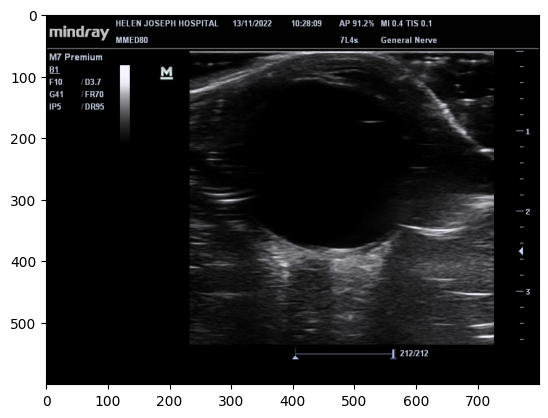

In [8]:
import matplotlib.pyplot as plt

# Display the first image
plt.imshow(images[0])
plt.show()

Mapping ONSD measurements to images to create labels

In [9]:
import pandas as pd
import os

# Load the DataFrame from the Excel file
excel_file = './Meta_pic.xlsx'
df = pd.read_excel(excel_file)

# Convert necessary columns to strings and create a label column following the naming convention
df['label'] = df['record_id'].astype(str) + '_image_data_' + df['redcap_repeat_instance'].astype(str) + '_raw_image.jpg'

# Now let's proceed to match and rename the images
documents_dir = './documents'  # Assuming this is your correct directory path

# Iterate over the DataFrame to match, rename images and create an ONSD mapping dictionary
image_onsd_mapping = {}
for index, row in df.iterrows():
    image_name_to_look_for = row['label']
    onsd_value = row['onsd']
    image_path = os.path.join(documents_dir, image_name_to_look_for)

    if os.path.exists(image_path):
        image_onsd_mapping[image_name_to_look_for] = onsd_value
    else:
        print(f"No matching file found for label: {image_name_to_look_for}")

# Display the ONSD mapping
for image_name, onsd_value in image_onsd_mapping.items():
    print(f"{image_name}: {onsd_value}")


MMED-002_image_data_1_raw_image.jpg: 5
MMED-002_image_data_2_raw_image.jpg: 5
MMED-003_image_data_1_raw_image.jpg: 5
MMED-004_image_data_1_raw_image.jpg: 5
MMED-004_image_data_2_raw_image.jpg: 5
MMED-005_image_data_1_raw_image.jpg: 5
MMED-005_image_data_2_raw_image.jpg: 4
MMED-006_image_data_1_raw_image.jpg: 5
MMED-006_image_data_2_raw_image.jpg: 5
MMED-007_image_data_1_raw_image.jpg: 4
MMED-007_image_data_2_raw_image.jpg: 5
MMED-008_image_data_1_raw_image.jpg: 5
MMED-008_image_data_2_raw_image.jpg: 5
MMED-009_image_data_1_raw_image.jpg: 4
MMED-010_image_data_1_raw_image.jpg: 5
MMED-010_image_data_2_raw_image.jpg: 6
MMED-011_image_data_1_raw_image.jpg: 4
MMED-011_image_data_2_raw_image.jpg: 4
MMED-012_image_data_1_raw_image.jpg: 4
MMED-012_image_data_2_raw_image.jpg: 4
MMED-013_image_data_1_raw_image.jpg: 4
MMED-013_image_data_2_raw_image.jpg: 5
MMED-014_image_data_1_raw_image.jpg: 5
MMED-014_image_data_2_raw_image.jpg: 5
MMED-015_image_data_1_raw_image.jpg: 5
MMED-015_image_data_2_raw

Create a csv file in this directory which have the image: measurement mapping

In [10]:
import pandas as pd

# Convert your dictionary to a DataFrame
df_onsd = pd.DataFrame(list(image_onsd_mapping.items()), columns=['filename', 'label'])

# Save this DataFrame to a CSV file
df_onsd.to_csv('image_labels.csv', index=False)


Experiment with Cropping of images

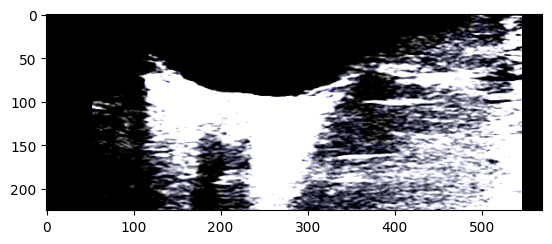

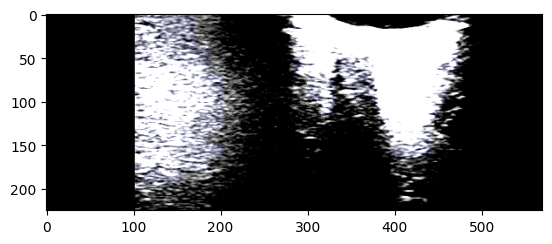

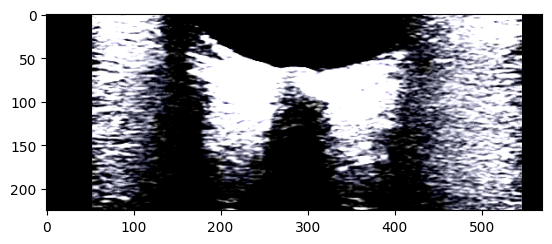

In [11]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

# Function to calculate crop coordinates and enhance contrast
def process_image(image_path, contrast_factor=1.5):
    with Image.open(image_path) as img:
        # Crop the image
        crop_box = (180, 300, 750, 525)
        cropped_img = img.crop(crop_box)
        # Enhance the contrast
        enhancer = ImageEnhance.Contrast(cropped_img)
        enhanced_img = enhancer.enhance(contrast_factor)
        return enhanced_img

# List your image paths here
image_paths = [
    'documents/MMED-009_image_data_1_raw_image.jpg',
    'documents/MMED-012_image_data_2_raw_image.jpg',
    'documents/MMED-017_image_data_2_raw_image.jpg'
]

# Adjust the contrast factor as needed
contrast_factor = 10

# This will iterate over the first three image paths, process them, and display them inline
for path in image_paths[:3]:
    processed_image = process_image(path, contrast_factor)
    plt.figure()
    plt.imshow(processed_image)
    plt.show()



Process Images: Crop and Enhance Contrast

In [12]:
from PIL import Image, ImageEnhance
import os

# Define the coordinates of the crop box (left, upper, right, lower)
crop_box = (180, 300, 750, 525)

# Path to the directory containing the images
image_dir = './documents'  # Replace with the path to your image directory

# New directory to store processed images
processed_dir = os.path.join(image_dir, 'processed_images')
if not os.path.exists(processed_dir):
    os.makedirs(processed_dir)

# List of all image filenames
image_filenames = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Process each image
for image_filename in image_filenames:
    image_path = os.path.join(image_dir, image_filename)
    with Image.open(image_path) as img:
        # Crop the image
        cropped_img = img.crop(crop_box)
        # Enhance the contrast
        enhancer = ImageEnhance.Contrast(cropped_img)
        enhanced_img = enhancer.enhance(10)  # Contrast factor of 10
        # Save the processed image in the 'processed_images' directory
        enhanced_img.save(os.path.join(processed_dir, f"enhanced_{image_filename}"))

print(f"Processed images are saved in {processed_dir}")




Processed images are saved in ./documents/processed_images


Creating a CSV with measurements linked to processed images in the same file

In [13]:
import pandas as pd
import os

# Load the DataFrame from the Excel file
excel_file = './Meta_pic.xlsx'
df = pd.read_excel(excel_file)

# Convert necessary columns to strings and create a label column following the naming convention
df['processed_label'] = 'enhanced_' + df['record_id'].astype(str) + '_image_data_' + df['redcap_repeat_instance'].astype(str) + '_raw_image.jpg'

# Define the directory containing your processed images
processed_images_dir = './documents/processed_images'  

# Create a new DataFrame to store image names and corresponding ONSD measurements
image_measurements = []

# Iterate over the DataFrame to find matches in the processed_images directory
for index, row in df.iterrows():
    processed_image_name = row['processed_label']
    onsd_value = row['onsd']
    image_path = os.path.join(processed_images_dir, processed_image_name)

    if os.path.exists(image_path):
        # If a matching processed image is found, append the details to the list
        image_measurements.append({'image_filename': processed_image_name, 'onsd_measurement': onsd_value})
    else:
        print(f"No matching file found for label: {processed_image_name}")

# Convert the list to a DataFrame
image_measurements_df = pd.DataFrame(image_measurements)

# Save this DataFrame to a CSV file in the processed_images directory
csv_file_path = os.path.join(processed_images_dir, 'image_measurements.csv')
image_measurements_df.to_csv(csv_file_path, index=False)

print(f"CSV file saved to {csv_file_path}")


CSV file saved to ./documents/processed_images/image_measurements.csv


Importing Libaries for simple CNN attempt for regression task of measuring ONSD

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np
import os
from PIL import Image


2024-06-03 15:04:59.089973: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-03 15:04:59.095344: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-03 15:04:59.261846: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-03 15:05:03.295353: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Load and split processed image data

In [15]:
import pandas as pd
import os
from PIL import Image
import numpy as np

# Correct base directory for your processed images
base_dir = r"C:\Users\cparker\OneDrive - WRHI\Andrew\FilesReport_UJReport_2024-03-14_1413 (1)\FilesReport_UJReport_2024-03-14_1413\documents\processed_images"

# Assuming you have 'image_measurements.csv' in the same directory as your processed images
csv_file = os.path.join(base_dir, 'image_measurements.csv')
df = pd.read_csv(csv_file)

# Function to load images based on the corrected path
def load_images(df, base_dir):
    images = []
    for _, row in df.iterrows():
        image_path = os.path.join(base_dir, row['image_filename'])
        try:
            with Image.open(image_path) as img:
                img = img.resize((128, 128))  # Resize for uniformity
                img_array = np.array(img)
                images.append(img_array)
        except FileNotFoundError:
            print(f"File not found: {image_path}")
    return np.array(images)

images = load_images(df, base_dir)
onsd_measurements = df['onsd_measurement'].values

# Normalize images
images = images / 255.0

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(images, onsd_measurements, test_size=0.2, random_state=42)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\cparker\\OneDrive - WRHI\\Andrew\\FilesReport_UJReport_2024-03-14_1413 (1)\\FilesReport_UJReport_2024-03-14_1413\\documents\\processed_images/image_measurements.csv'

Simple CNN model architecture

In [ ]:
def build_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1)  # Single output node for regression
    ])
    return model


In [ ]:
model = build_model()
model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])  # MSE is a common loss for regression


c:\Users\cparker\AppData\Local\anaconda3\envs\new_env_name\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))


Epoch 1/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 404ms/step - loss: 13.4317 - mae: 3.2366 - val_loss: 4.2849 - val_mae: 1.9633
Epoch 2/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 333ms/step - loss: 3.4537 - mae: 1.6301 - val_loss: 1.9242 - val_mae: 1.0199
Epoch 3/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 319ms/step - loss: 1.6888 - mae: 1.0630 - val_loss: 1.1091 - val_mae: 0.9067
Epoch 4/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 281ms/step - loss: 1.5675 - mae: 0.9734 - val_loss: 0.6009 - val_mae: 0.6488
Epoch 5/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 252ms/step - loss: 1.4316 - mae: 1.0229 - val_loss: 0.6651 - val_mae: 0.7108
Epoch 6/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - loss: 1.3817 - mae: 0.9689 - val_loss: 0.5521 - val_mae: 0.5953
Epoch 7/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step - loss: 1.3387 - mae: 0.9077 - val_loss: 0.5214 - val_mae: 0.5846
Epoch 8/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step - loss: 0.9880 - mae: 0.7963 - val_loss: 0.5283 - val_mae: 0.6263
Epoch 9/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step - loss: 0.9718 - mae:

In [ ]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.4580 - mae: 0.5967 
Test MAE: 0.6017224788665771


In [ ]:
# Make predictions
predictions = model.predict(X_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


In [ ]:
for i in range(len(predictions)):
    print(f"Predicted: {predictions[i][0]}, Actual: {y_test[i]}")


Predicted: 5.022789001464844, Actual: 6
Predicted: 4.8087897300720215, Actual: 4
Predicted: 4.402955055236816, Actual: 4
Predicted: 4.656641006469727, Actual: 5
Predicted: 4.212963104248047, Actual: 4
Predicted: 4.484567642211914, Actual: 4
Predicted: 4.709301471710205, Actual: 4
Predicted: 4.3119916915893555, Actual: 5
Predicted: 4.649680137634277, Actual: 4
Predicted: 4.0845160484313965, Actual: 5
Predicted: 4.482450485229492, Actual: 5
Predicted: 4.377983093261719, Actual: 5
Predicted: 4.468952178955078, Actual: 5
Predicted: 4.575881004333496, Actual: 5
Predicted: 4.281538486480713, Actual: 4
Predicted: 4.6231865882873535, Actual: 5
Predicted: 5.148199081420898, Actual: 4
Predicted: 4.152264595031738, Actual: 5
Predicted: 4.6205735206604, Actual: 5
Predicted: 4.4789628982543945, Actual: 5
Predicted: 4.620180130004883, Actual: 5
Predicted: 4.364132881164551, Actual: 5
Predicted: 4.353765487670898, Actual: 5
Predicted: 4.585275650024414, Actual: 4
Predicted: 4.478957176208496, Actual:

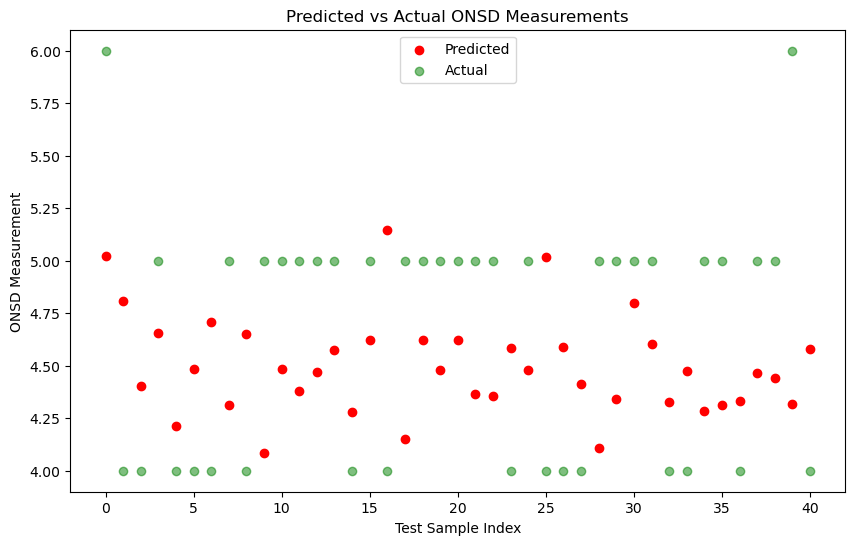

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(range(len(predictions)), predictions, color='r', label='Predicted')
plt.scatter(range(len(y_test)), y_test, color='g', alpha=0.5, label='Actual')
plt.title('Predicted vs Actual ONSD Measurements')
plt.xlabel('Test Sample Index')
plt.ylabel('ONSD Measurement')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Square Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 0.601722496311839
Root Mean Square Error (RMSE): 0.6616211293073727


[[6.         5.022789  ]
 [4.         4.80878973]
 [4.         4.40295506]
 [5.         4.65664101]
 [4.         4.2129631 ]
 [4.         4.48456764]
 [4.         4.70930147]
 [5.         4.31199169]
 [4.         4.64968014]
 [5.         4.08451605]]


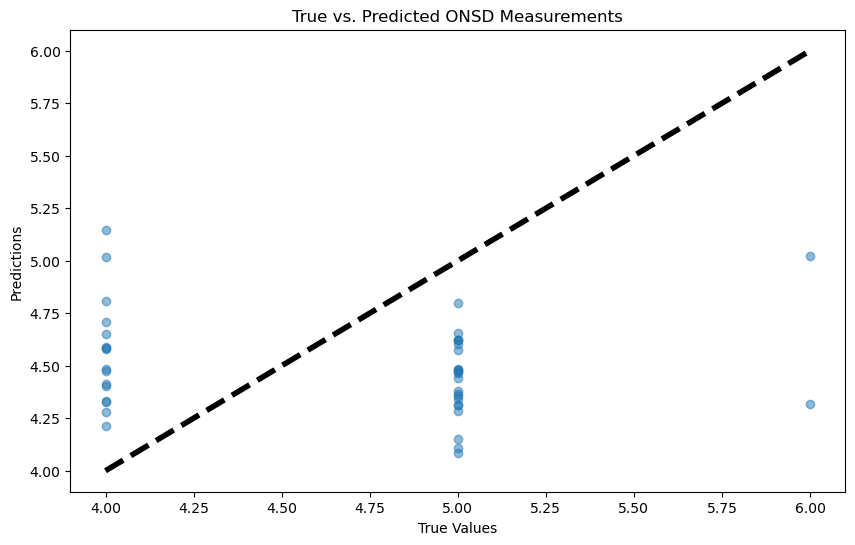

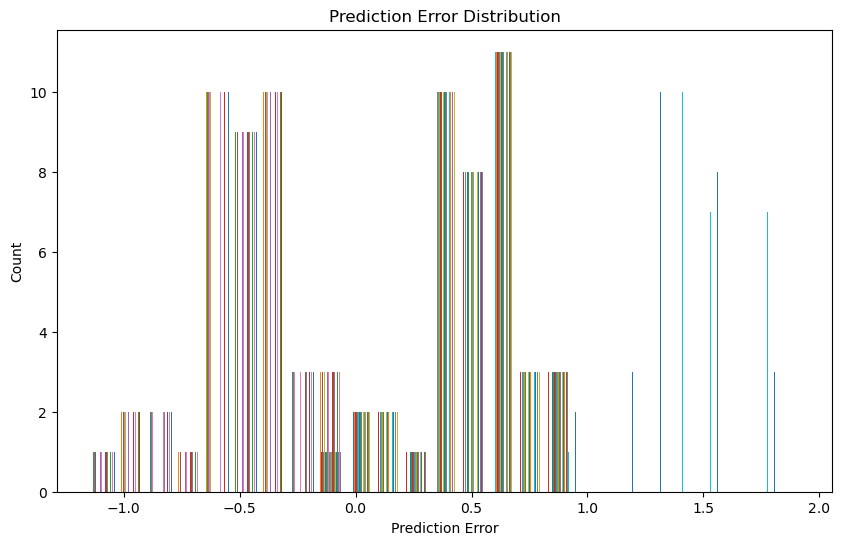

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'predictions' is a numpy array of your model's predicted ONSD measurements
# and 'y_test' is the true ONSD measurements

# Compare predictions with actual values
comparison = np.column_stack((y_test, predictions))

# Print the first few comparisons to check
print(comparison[:10])

# Plotting the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Diagonal line for reference
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted ONSD Measurements')
plt.show()

# Plotting the error distribution
errors = y_test - predictions
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=25)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Prediction Error Distribution')
plt.show()


Trying a different architecture to see if it improves performance

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

def build_enhanced_model(input_shape=(128, 128, 3)):
    model = Sequential()

    # First Conv Block
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    # Second Conv Block
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    # Third Conv Block
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))

    # Flatten and Dense Layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1))  # Output layer for regression

    return model


Building what I hope to be an enhanced model 

In [ ]:
model = build_enhanced_model()
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Now you would train your model, perhaps with more epochs or different batch sizes
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))


c:\Users\cparker\AppData\Local\anaconda3\envs\new_env_name\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 993ms/step - loss: 25.7013 - mae: 4.6210 - val_loss: 18.7078 - val_mae: 4.2757
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 656ms/step - loss: 23.4332 - mae: 4.6811 - val_loss: 9.9575 - val_mae: 2.9622
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 689ms/step - loss: 21.8419 - mae: 4.5294 - val_loss: 1.2308 - val_mae: 0.9264
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 885ms/step - loss: 20.2010 - mae: 4.2763 - val_loss: 23.1684 - val_mae: 4.8417
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 771ms/step - loss: 19.6079 - mae: 4.2699 - val_loss: 91.0971 - val_mae: 9.5911
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 20.7383 - mae: 4.4061 - val_loss: 211.3496 - val_mae: 14.5820
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 891ms/step - loss: 19.2652 - mae: 4.2510 - val_loss: 403.8599 - val_mae: 20.1449
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 898ms/step - loss: 17.1925 - mae: 3.9884 - val_loss: 698.7450 - val_mae: 26.4707
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss:

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 313ms/step
Mean Absolute Error (MAE): 408.7217935701696
Mean Squared Error (MSE): 169405.6580003846
Root Mean Squared Error (RMSE): 411.5891859614203


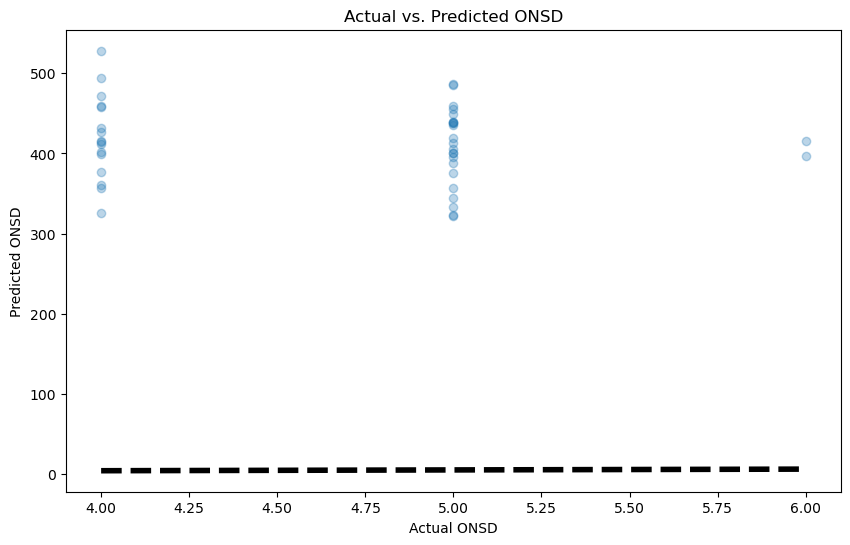

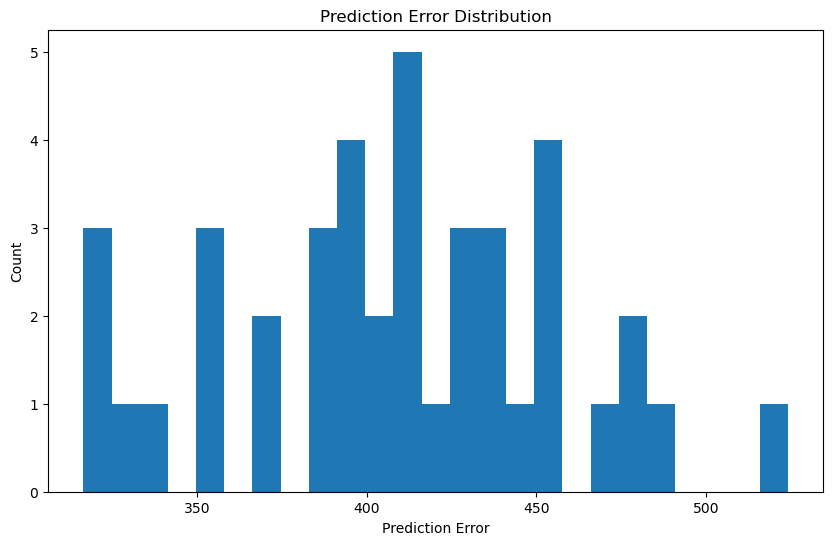

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'X_test' and 'y_test' are your test datasets

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)  # RMSE is just the square root of MSE

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plotting Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Diagonal line
plt.xlabel('Actual ONSD')
plt.ylabel('Predicted ONSD')
plt.title('Actual vs. Predicted ONSD')
plt.show()

# Plotting the error distribution
errors = predictions.flatten() - y_test
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=25)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Prediction Error Distribution')
plt.show()


In [ ]:
# Assuming 'predictions' is a numpy array with the predicted ONSD values
# And 'y_test' is the actual ONSD measurements from the test set

# Convert predictions to a 1D array if it's not already
predictions = predictions.flatten()

# Create a DataFrame for a cleaner display
comparison_df = pd.DataFrame({'Actual ONSD': y_test, 'Predicted ONSD': predictions})

# Add a column for absolute error
comparison_df['Absolute Error'] = np.abs(comparison_df['Actual ONSD'] - comparison_df['Predicted ONSD'])

# Display several examples
print(comparison_df.head(10))


   Actual ONSD  Predicted ONSD  Absolute Error
0            6      396.189117      390.189117
1            4      411.572174      407.572174
2            4      493.746918      489.746918
3            5      486.883026      481.883026
4            4      431.479218      427.479218
5            4      415.047638      411.047638
6            4      427.159119      423.159119
7            5      455.890778      450.890778
8            4      377.288330      373.288330
9            5      323.652740      318.652740


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Compile model with a smaller learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])

# Add early stopping to halt training when validation loss increases
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model with early stopping
history = model.fit(
    X_train, y_train, 
    batch_size=32, 
    epochs=50, 
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - loss: 1.9676 - mae: 1.1282 - val_loss: 167538.0156 - val_mae: 401.3080
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 832ms/step - loss: 1.6455 - mae: 0.9969 - val_loss: 158174.5156 - val_mae: 389.0803
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 679ms/step - loss: 1.4243 - mae: 0.9671 - val_loss: 151552.5469 - val_mae: 380.0253
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 719ms/step - loss: 1.9559 - mae: 1.1046 - val_loss: 147886.8125 - val_mae: 374.6902
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 761ms/step - loss: 1.5172 - mae: 0.9937 - val_loss: 147118.6250 - val_mae: 373.2339
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 682ms/step - loss: 1.3458 - mae: 0.9782 - val_loss: 146872.6875 - val_mae: 372.4131
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 707ms/step - loss: 1.8190 - mae: 1.0574 - val_loss: 147568.4062 - val_mae: 373.0750
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 786ms/step - loss: 2.1950 - mae: 1.1294 - val_loss: 144092.7500 - val_mae: 368.1201
Epoch 9/50
6/6 ━━━

1/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000013D1B8C8220> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 465ms/step
Mean Absolute Error (MAE): 31.434593463816295
Mean Squared Error (MSE): 2859.5542547294936
Root Mean Squared Error (RMSE): 53.47480018410067


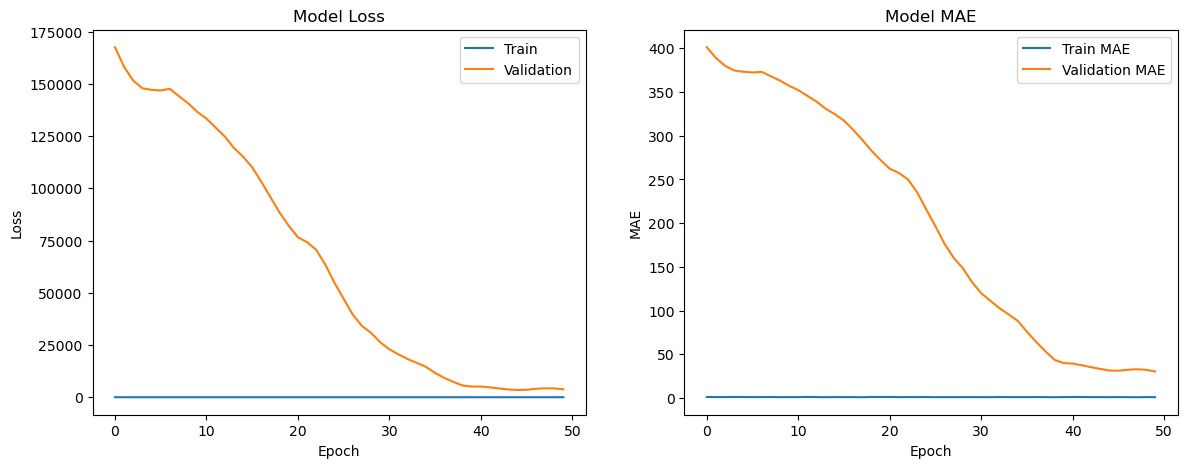

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Generate predictions
predictions = model.predict(X_test).flatten()

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the training history
plt.figure(figsize=(14, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation MAE values
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.show()


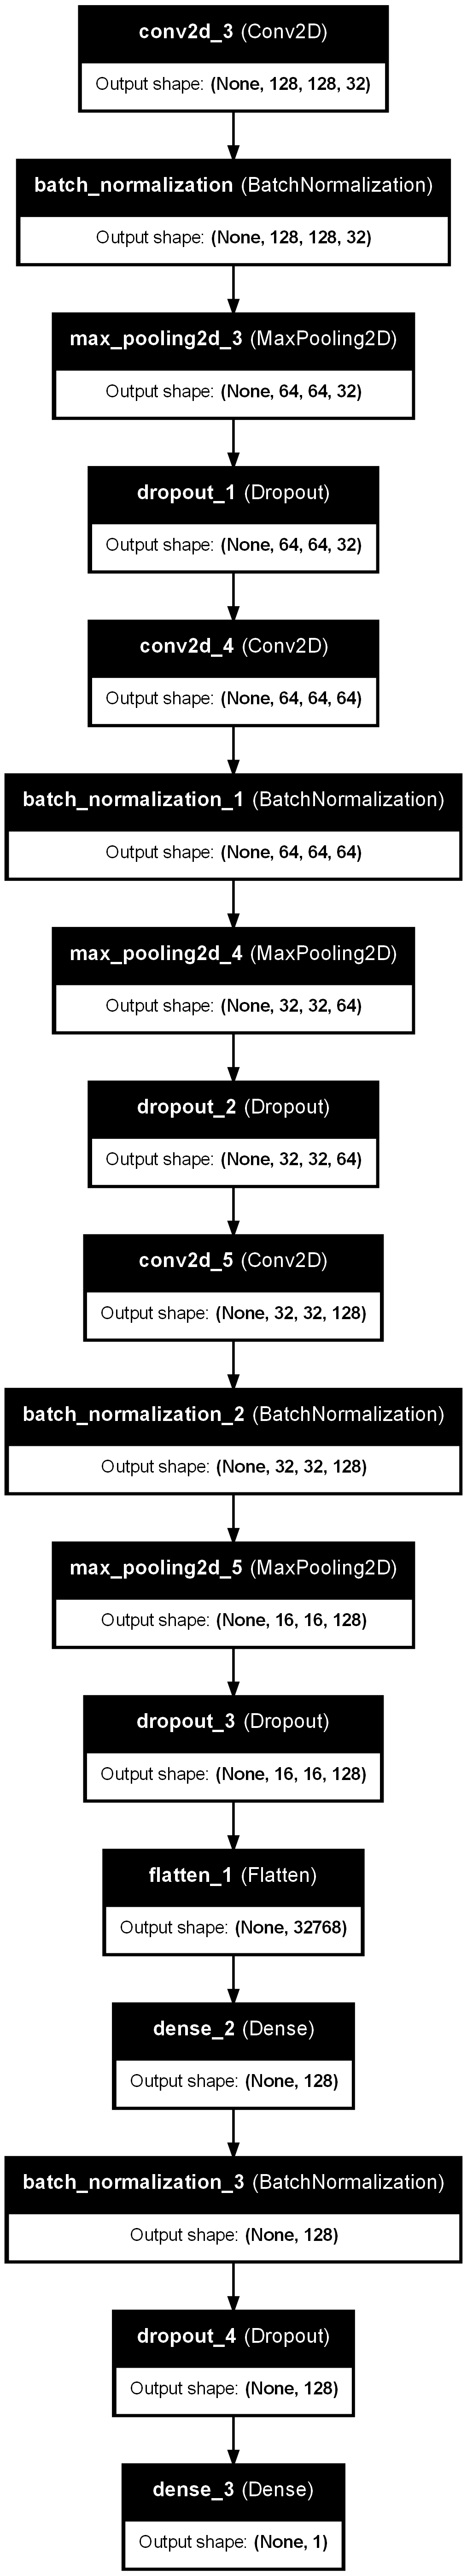

In [ ]:
from tensorflow.keras.utils import plot_model

# Assuming 'model' is your CNN model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


In [ ]:
import tensorflow as tf
from keras.callbacks import TensorBoard
import datetime

# Create a log directory for storing TensorBoard logs
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True)


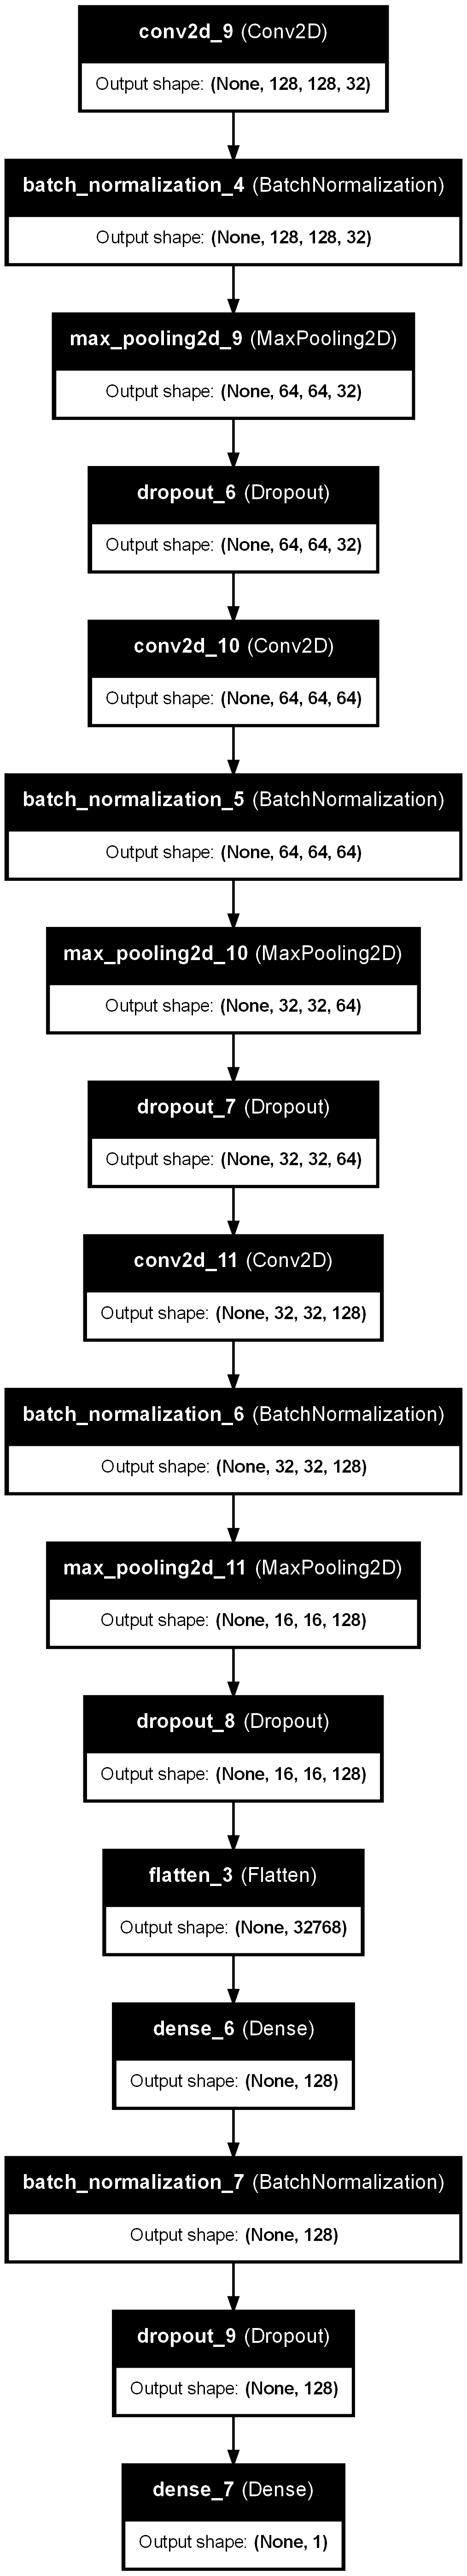

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import plot_model

def build_enhanced_model(input_shape=(128, 128, 3)):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.4),
        Flatten(),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1)
    ])

    return model

model = build_enhanced_model()
plot_model(model, to_file='model_diagram.png', show_shapes=True, show_layer_names=True)

